In [1]:
#get 방식으로 할거야
import requests
#"인증키 복붙해줘"
API_KEY="cOT2ihmAB4doULCYS%2BPkWQRxmiaX8JRccdBBQaiJXaeMh7HRFGDygqIRpIk6D6BB2pXnh6IWcHSPW6E%2Fqoz67Q%3D%3D"
#타입 바꿔주기
API_KEY_DECODE= requests.utils.unquote(API_KEY)
API_KEY_DECODE

'cOT2ihmAB4doULCYS+PkWQRxmiaX8JRccdBBQaiJXaeMh7HRFGDygqIRpIk6D6BB2pXnh6IWcHSPW6E/qoz67Q=='

In [2]:
#End Point에 적힌 url
reg_url="http://openapi.epost.go.kr:80/postal/retrieveNewAdressAreaCdService?_wadl&type=xml"

In [3]:
#길을 검색하겠다
search_Se="road"
search_word="반포대로 201"
reg_parameter={"ServiceKey":API_KEY_DECODE,
              "search_Se":search_Se,
              "srchwrd":search_word}

#리퀘스트로 보내기. 요청하기 url에 parameter 넣어주세요.
r=requests.get(reg_url,reg_parameter)
print(r)

<Response [200]>


In [4]:
print(r.text)

<application xmlns="http://research.sun.com/wadl/2006/10" xmlns:xs="http://www.w3.org/2001/XMLSchema"><grammars><xs:schema xmlns:xs="http://www.w3.org/2001/XMLSchema" attributeFormDefault="unqualified" elementFormDefault="unqualified">
    <xs:element name="CmmResponse" type="cmmResponse"/>
    <xs:element name="NewAddressListResponse" type="newAddressListAreaCdResponse"/>
    <xs:complexType name="newAddressListAreaCdResponse">
        <xs:complexContent>
            <xs:extension base="cmmResponse">
                <xs:sequence>
                    <xs:element maxOccurs="unbounded" minOccurs="0" name="newAddressListAreaCd" nillable="true" type="NewAddressList"/>
                </xs:sequence>
            </xs:extension>
        </xs:complexContent>
    </xs:complexType>
    <xs:complexType name="cmmResponse">
        <xs:sequence>
            <xs:element minOccurs="0" name="cmmMsgHeader" type="CmmMsgHeader"/>
            <xs:element minOccurs="0" name="errorCode" type="xs:string"/>
 

In [5]:
import xmltodict
#parse=구문 분석 해주세요
dict_data=xmltodict.parse(r.text)
dict_data

OrderedDict([('application',
              OrderedDict([('@xmlns', 'http://research.sun.com/wadl/2006/10'),
                           ('@xmlns:xs', 'http://www.w3.org/2001/XMLSchema'),
                           ('grammars',
                            OrderedDict([('xs:schema',
                                          OrderedDict([('@xmlns:xs',
                                                        'http://www.w3.org/2001/XMLSchema'),
                                                       ('@attributeFormDefault',
                                                        'unqualified'),
                                                       ('@elementFormDefault',
                                                        'unqualified'),
                                                       ('xs:element',
                                                        [OrderedDict([('@name',
                                                                       'CmmResponse'),
                

In [6]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
from selenium import webdriver

1. 주제 선정
2. 데이터 수집(웹 크롤링,web api(공공데이터), 교육용(캐글데이터,데이콘,))
3. 데이터 전처리(결측치 처리, 컬럼 종합 등)
4. 데이터 분석(상관도, ML(회귀,분류))
5. 결론 종합(도출)

          27(월)~31(금) 
          월-화: 조원 성향 파악.
          수:데이터 수집, 전처리 완료
          목: (오전:분석 완료) (오후: ppt 작업 시작)
          금: (오전:ppt다듬기) (오후: 발표)
          

### 깃허브 데이터 받아보기. 페이지 주소만 알면 된다.

In [7]:
url="https://github.com/java-ninano/MountainProject/blob/%2Bmaster/src/main/webapp/index.jsp"

r=requests.get(url)
#print(r.text)
with open("이다윤jsp.html","wb") as f:
    f.write(r.content)

In [8]:
#결측치 처리 다시 해봅시당.
import pandas as pd

In [9]:
#'연도' 칼럼을 인덱스로 쓰겠습니다.
df=pd.read_csv("missing_data_test.csv",encoding="cp949",index_col="연도")
df
#앗 결측치 발견!!! 얘네 없애고싶어.

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,NaN,250,140.0,NaN


In [10]:
df.info()
#다섯개의 컬럼 .... 각 컬럼에 몇개씩 결측치 있나요

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 2015 to 2019
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제품1     4 non-null      float64
 1   제품2     5 non-null      int64  
 2   제품3     4 non-null      float64
 3   제품4     2 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 200.0 bytes


In [11]:
df.isnull() #어디가 결측치인지 보여주는함수

,제품1,제품2,제품3,제품4
연도,,,,
2015,False,False,True,True
2016,False,False,False,True
2017,False,False,False,False
2018,False,False,False,False
2019,True,False,False,True


In [12]:
#결측치 개수 몇개인지 셀 때는 sum을 씁니다.
df.isnull().sum()

제품1    1
제품2    0
제품3    1
제품4    3
dtype: int64

In [13]:
#특정 행을 drop으로 날려서 결측치 없애보자. 없앴으면 다시 df 업데이트.
df=df.drop(index=[2019])

In [14]:
#특정 컬럼을 날려보자
df.drop(columns=["제품3","제품4"])

,제품1,제품2
연도,,
2015,250.0,150
2016,200.0,160
2017,150.0,200
2018,120.0,230


In [15]:
df=pd.read_csv("missing_data_test.csv",encoding="cp949",index_col="연도")
df

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,NaN,250,140.0,NaN


In [16]:
#처음부터 다시 시작! 결측치 한번에 처리하는 방법

In [17]:
df.drop(index=[2018,2019],columns=["제품3","제품4"])

,제품1,제품2
연도,,
2015,250.0,150
2016,200.0,160
2017,150.0,200


In [18]:
df=pd.read_csv("missing_data_test.csv",encoding="cp949",index_col="연도")
df

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,NaN,250,140.0,NaN


In [19]:
df.dropna() 

,제품1,제품2,제품3,제품4
연도,,,,
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0


In [20]:
df.dropna(axis=1) #컬럼 기준으로 남기기

,제품2
연도,
2015,150
2016,160
2017,200
2018,230
2019,250


In [21]:
df.dropna(axis=0,subset=["제품1"]) #행단위로 날리고, 제품 1 컬럼에서만 날려주세요.

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0


In [22]:
df.dropna(axis=1,subset=[2015])#컬럼 단위로 날리고, 2015년 기준으로 날려주세요. 나머지는 결측치 남아도 돼요.

,제품1,제품2
연도,,
2015,250.0,150
2016,200.0,160
2017,150.0,200
2018,120.0,230
2019,NaN,250


In [23]:
#subset에도 여러개 쓸 수 있어요.
#fillna() = 결측치 자리 채워주세요. 
df.fillna(0)

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,0.0,0.0
2016,200.0,160,170.0,0.0
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,0.0,250,140.0,0.0


In [24]:
df.fillna(method="bfill") #아래 셀의 값(이전의 값)으로 채워주는 것,

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,170.0,150.0
2016,200.0,160,170.0,150.0
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,NaN,250,140.0,NaN


In [25]:
df.fillna(method="ffill")#위의 셀의 값으로 채워주기.

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,120.0,250,140.0,170.0


In [26]:
df.fillna(df.mean()) #각 컬럼의 평균값으로 채워주기

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,135.0,160.0
2016,200.0,160,170.0,160.0
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,180.0,250,140.0,160.0


In [27]:
df.describe() # 자, 여길 보면 평균값이 보이지~~~ 결측치가 이 describe 통계에 영향을 안주려면 결측치를 평균값으로 채워주는 것이 좋다.

,제품1,제품2,제품3,제품4
count,4.000000,5.000000,4.000000,2.000000
mean,180.000000,198.000000,135.000000,160.000000
std,57.154761,43.243497,28.867513,14.142136
min,120.000000,150.000000,100.000000,150.000000
25%,142.500000,160.000000,122.500000,155.000000
50%,175.000000,200.000000,135.000000,160.000000
75%,212.500000,230.000000,147.500000,165.000000
max,250.000000,250.000000,170.000000,170.000000


In [28]:
df["제품1"].value_counts() #중복되지 않는 값 개수 세기

250.0    1
200.0    1
150.0    1
120.0    1
Name: 제품1, dtype: int64

In [29]:
df_sales=pd.read_csv("total_sales_data.csv")
df_sales #매장명부터 보델명까지는 인덱스로써도 무방한 아이들. 판매, 재고는 밸류값.

,매장명,제품종류,모델명,판매,재고
0,A,스마트폰,S1,1,2
1,A,스마트폰,S2,2,5
2,A,TV,V1,3,5
3,B,스마트폰,S2,4,6
4,B,스마트폰,S1,5,8
5,B,TV,V1,6,9
6,C,스마트폰,S2,2,4
7,C,TV,V1,3,6
8,C,TV,V2,7,9


In [30]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   매장명     9 non-null      object
 1   제품종류    9 non-null      object
 2   모델명     9 non-null      object
 3   판매      9 non-null      int64 
 4   재고      9 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 488.0+ bytes


In [31]:
df_sales["매장명"].value_counts() #겹치는 데이터 수 세어주세요. #특정 컬럼 이름을 넣고 검색.

A    3
B    3
C    3
Name: 매장명, dtype: int64

In [32]:
#피봇테이블 만들어볼래. 중복되는 밸류정보들을 집계해서 보고싶다.
#피봇은 컬럼에 얽힌 데이터들이 인덱스 될만한 것과 밸류 될만한 것 나뉠때만 쓸 수 있어.
#계산은 sum을 이용해서 해.
df_sales.pivot_table(index=["매장명","제품종류","모델명"],
                    values=["판매","재고"],aggfunc="sum")

재고  판매
매장명 제품종류 모델명        
A   TV   V1    5   3
    스마트폰 S1    2   1
         S2    5   2
B   TV   V1    9   6
    스마트폰 S1    8   5
         S2    6   4
C   TV   V1    6   3
         V2    9   7
    스마트폰 S2    4   2

In [33]:
#인덱스 너무 많이 잡으니까 보기 힘들어. 매장명으로만 잡아볼래.
df_sales.pivot_table(index=["매장명"],columns=["제품종류"],
                    values=["판매","재고"],aggfunc="sum")

재고       판매     
제품종류  TV 스마트폰  TV 스마트폰
매장명                   
A      5    7   3    3
B      9   14   6    9
C     15    4  10    2

In [34]:
#근데 이거 머신러닝에서는 쓰기 힘들다고 하더라.

In [35]:
!pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp39-cp39-win_amd64.whl size=161112 sha256=bbef4a3bb31570efb6795e63a1f0b2e4457dcbb531955ab0ddefd975c7699885
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\f9\7a\dd\06ef8b5dfe5483f6204133c08eeb16c287cc2c05e290ae2fc0
Successfully built wordcloud


In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [38]:
import sys
print(sys.version)

3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


In [39]:
#영어는 형태소 분석기 필요 없음. 한글은 필요행.

### 워드 클라우드 

In [41]:
#p550
with open("littleprince_djvu.txt") as f:
    text= f.read()
text

'THE LITTLE PRINCE \n\nAntoine De Saint-Exupery \n\nAntoine de Saint-Exupery, who was a French author, journalist and pilot wrote \nThe Little Prince in 1943, one year before his death. \n\nThe Little Prince appears to be a simple children’s tale, \nsome would say that it is actually a profound and deeply moving tale, \nwritten in riddles and laced with philosophy and poetic metaphor. \n\n\n\n\nOnce when I was six years old I saw a magnificent picture in a book, called True Stories from \nNature, about the primeval forest. It was a picture of a boa constrictor in the act of swallowing an \nanimal. Here is a copy of the drawing. \n\nIn the book it said: “Boa constrictors swallow their prey whole, without chewing it. After that they \nare not able to move, and they sleep through the six months that they need for digestion.” I \npondered deeply, then, over the adventures of the jungle. And after some work with a coloured \npencil I succeeded in making my first drawing. My Drawing Number O

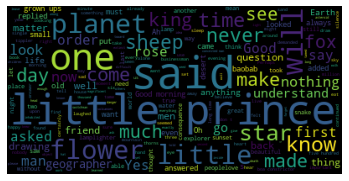

In [45]:
wordcloud_image= WordCloud().generate(text)
plt.imshow(wordcloud_image)
plt.axis("off") #좌표값끄기
plt.show()

In [46]:
#빈도수로 분석해보기.word count

In [48]:
word_count=pd.read_csv("word_count.csv",index_col='단어')
word_count

,빈도
단어,
산업혁명,1662
기술,1223
사업,1126
혁신,1084
경제,1000
한국,945
기업,909
교육,883
미래,746


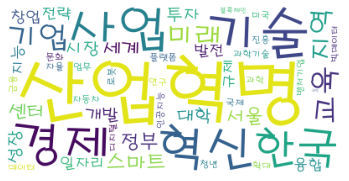

In [51]:
font_path="hypost-light\HYPost-Light.ttf"
wc=WordCloud(font_path,background_color="white")
frequency=word_count["빈도"]
image=wc.generate_from_frequencies(frequency)
plt.imshow(image)
plt.axis("off") #좌표값끄기
plt.show()

In [52]:
#자바설치

In [53]:
import sys
print(sys.version)

3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


In [54]:
import konlpy

ModuleNotFoundError: No module named 'konlpy'